# The Fast & The Curious - Project Report <br>


### Members: 
&emsp; Georgi Nikolov<br>
&emsp; Daniel Valencia<br>
&emsp; Lizbeth Gutierrez<br>
&emsp; (NAME)


### Project Sections:
&emsp; Section 1: Project Introduction <br>
&emsp; Section 2: Changes to Project Thus Far <br>
&emsp; Section 3: Data Cleaning <br>
&emsp; Section 4: Exploratory Data Analysis <br>
&emsp; Section 5: Visualization <br>
&emsp; Section 6: Machine Learning Analysis <br>
&emsp; Section 7: Reflection <br>
&emsp; Section 8: Next Steps <br>




## Section 1: Project Introduction

As of this moment we have four different goals that we could like to accomplish and they are as follows:

1. We want to analyze weather data in order to make predictions about adverse weather conditions.
2. Climate change has caused weather patterns to become more severe and dangerous over the last few years.
3. Having access to more accurate weather predictions would allow for advanced warnings and help people escape potentially dangerous weather conditions.
4. We chose to investigate this topic because it is highly relevant to today’s world and severe weather will only get stronger as time goes on.
<br>

Ideally we will accomplish these goals via the following methodologies:<br>
> A Visualization that intends to look at temperature changes over the course of an entire year here in Chicago.
> A Machine learning implementation that will predict precipitation based on data relating to air pressure and temperature.
> A Scatterplot to investigate if sea level air pressure relates to the average wind speed of a given area.
> An Histogram of weather condition codes to give insight into various meteorological tendencies  .


Generally speaking we will be using **MeteoStat** for our data collection<br>
1. API that connects to different weather stations around the world
2. Able to access historical data via independent weather stations 
3. Free for use in development (no license required)
4. Independent Python library compatible with Pandas




## Section 2: Changes to Project (From Check-in) <br>

As of this moment in time there are no major changes that were made between the time of submission of the presentation slides and check-in compared to now. We overall kept the same plan and tried our best to solve and implement the goals we had set for ourselves and this data.

## Section 3: Data Cleaning <br>

First, we loaded up the data as a dataframe (df). We displayed the data as normal prior to cleaning it to show what is stored in the dataframe.

In [2]:
import pandas as pd
import requests

url = "https://meteostat.p.rapidapi.com/stations/daily"
querystring = {"station":"KPWK0","start":"2012-01-01","end":"2021-01-01","model":"true","units":"imperial"}
headers = {
	"X-RapidAPI-Key": "6fec950325msha54f5bc890b65e0p1fd8d0jsnc882976e1304",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers, params=querystring)
json = response.json()
type(json['data'])
type(json['data'][0])
df = pd.DataFrame(json['data'])
df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2012-01-01,36.7,30.9,45.0,NaN,None,268.0,17.2,None,NaN,None
1,2012-01-02,23.2,18.0,30.0,NaN,None,315.0,17.2,None,NaN,None
2,2012-01-03,21.2,12.9,28.0,0.000,None,NaN,9.3,None,1027.0,None
3,2012-01-04,33.3,26.1,41.0,0.000,None,NaN,7.9,None,1016.3,None
4,2012-01-05,38.5,25.0,50.0,0.000,None,NaN,6.7,None,1012.5,None
...,...,...,...,...,...,...,...,...,...,...,...
3284,2020-12-28,30.0,21.9,35.1,0.000,None,296.0,10.4,None,1024.9,None
3285,2020-12-29,25.7,18.0,32.0,NaN,None,145.0,6.3,None,NaN,None
3286,2020-12-30,32.0,27.0,36.0,0.291,None,246.0,13.3,None,1014.2,None
3287,2020-12-31,24.8,19.0,28.0,NaN,None,288.0,4.0,None,NaN,None


The columns from data frame that were dropped and were not kept were snow, wdir, wspd, tsun and wpgt. 
Snow is an integer value column that records the maximum snow dept in mm. Wdir is a column that tracks the average wind direction in degrees as an integer value. Wspd and Wpgt are columns that track the average wind speed in km/h, and the peak wind gust in km/h as float values. Tsun tracks the daily sunshine total in minutes as an integer type.

Since we are not focusing on information focused on wind and daily sunshine in this project, these rows were chosen to be dropped. Since we are primarily focused on air pressure and temperature in this project, these columns dropped were not seen as important as others so they were not kept to keep the dataframe used cleaner. Furthermore, rows were dropped with NaN values because in the case of prcp, 1435 rows were shown to not have a value in that specific square and in many of these cases, several rows also had a NaN value in prcp and pres. 

To keep the data cleaner to consistently use as many rows as possible, the rows discussed above were dropped. Furthermore, after dropping rows and columns, the dataframe used changed from a dataframe with 3289 rows × 11 columns to a dataframe with 1583 rows × 6 columns.

In [3]:
# we will be keeping date, tavg, tmin, tmax, prcp, and pres columns, here we drop the columns discussed in the markdown above:
df = df.drop("snow", axis='columns')
df = df.drop("wdir", axis='columns')
df = df.drop("wspd", axis='columns')
df = df.drop("wpgt", axis='columns')
df = df.drop("tsun", axis='columns')

# shows the rows with NaN in rows:
df[df['prcp'].isna()]
df[df['pres'].isna()]

# drop rows with NaN in rows:
df = df.dropna(subset=['prcp','pres'])

#print post dropped rows, after cleaning data
df

,date,tavg,tmin,tmax,prcp,pres
2,2012-01-03,21.2,12.9,28.0,0.000,1027.0
3,2012-01-04,33.3,26.1,41.0,0.000,1016.3
4,2012-01-05,38.5,25.0,50.0,0.000,1012.5
5,2012-01-06,47.5,42.1,55.9,0.000,1006.5
6,2012-01-07,37.8,27.0,45.0,0.000,1017.3
...,...,...,...,...,...,...
3276,2020-12-20,36.7,32.0,42.1,0.000,1011.9
3278,2020-12-22,38.1,33.1,41.0,0.000,1019.2
3281,2020-12-25,16.2,9.0,21.9,0.000,1014.5
3284,2020-12-28,30.0,21.9,35.1,0.000,1024.9


## Section 4: Exploratory Data Analysis <br>

## Section 5: Visualization <br>

As the goal above suggests we will be taking a look at the different temperatures throughout the year here in Chicago, Illinois. 

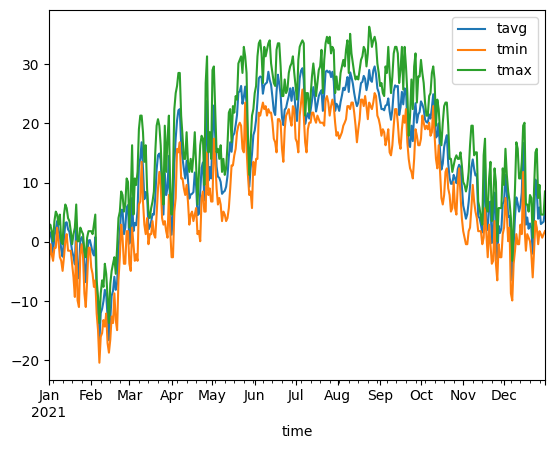

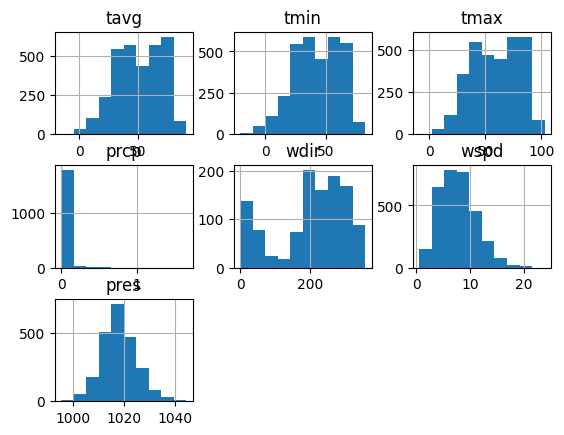

In [11]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2021, 12, 31)

# Create Point for Chicago
chicago = Point(41.868755, -87.646090, 70)

# Get daily data for 2018
data = Daily(chicago, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
df.hist()
plt.title("Temperature Over 2021")
plt.show()

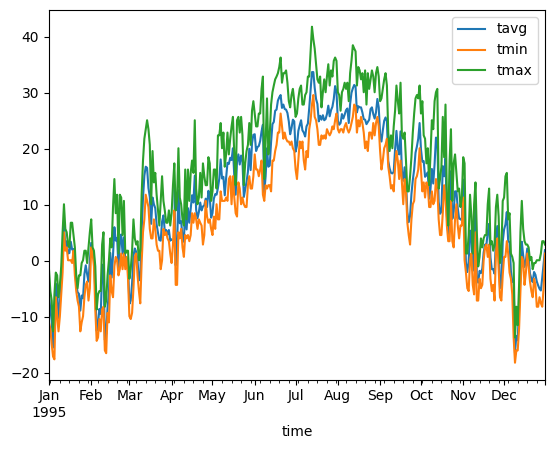

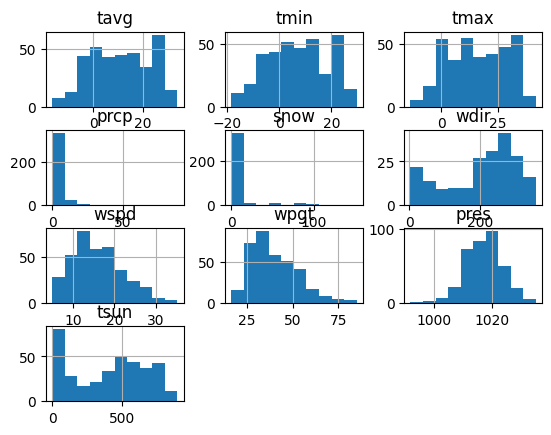

In [15]:
# Set time period
start = datetime(1995, 1, 1)
end = datetime(1995, 12, 31)

# Create Point for Chicago
chicago = Point(41.868755, -87.646090, 70)

# Get daily data for 2018
data = Daily(chicago, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
data.hist()
plt.title("Temperature Over 1995")
plt.show()

Here we have data being collected from an x,y coordinate plane (I used google maps to pinpoint the coordinates of UIC and used that point to represent Chicago). In addition, I also make sure to add a bit more data than just the average temp but I also factored in the lower range and the higher range for that particular date. I've also included a histogram of the respective columns to get an idea of where the temperatures are headed.

## Section 6: Machine Learning Analysis <br>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# remove dashes from date column and convert the column type to an int
df['date'] = df['date'].replace('-', '', regex=True).astype(int)

# split the data into two sets
X = df.drop(["prcp"], axis=1)
Y = df["prcp"]

# create training and testing data using a 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# create models and train them
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# calculate and display scores for baseline decision tree model
neg_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
tree_scores = np.sqrt(-neg_scores)
print("Tree scores: ", tree_scores)
print("Tree mean: ", tree_scores.mean())
print("Tree standard deviation: ", tree_scores.std())

Tree scores:  [0.22530714 0.28040256 0.37245434 0.31454997 0.42789549 0.21665018
 0.24629011 0.41739567 0.29304516 0.41769496]
Tree mean:  0.321168557011222
Tree standard deviation:  0.0779838157009992


We created this model to serve as our baseline in order to be able to draw comparisons with more advanced models. Based on the mean computed, the results for this baseline model can be interpreted as on average, the model will be off by about 0.32 mm of total precipitation on any given date.

In [7]:
# calculate and display scores for random forest model
neg_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
forest_scores = np.sqrt(-neg_scores)
print("Forest scores: ", forest_scores)
print("Forest mean: ", forest_scores.mean())
print("Forest standard deviation: ", forest_scores.std())

Forest scores:  [0.17936094 0.24078524 0.3421941  0.22073289 0.27621164 0.19429581
 0.23700692 0.30715896 0.206858   0.41766409]
Forest mean:  0.2622268592079195
Forest standard deviation:  0.0708057905563147


To provide a comparison against the singular decision tree baseline model, we used a random forest regressor which collects multiple decision trees together. We were hopeful to see it perform better as typically random forest models produce better results with larger datasets when compared to a single decison tree. As displayed above, the random forest model did produce better results as on average on any given date, it would be off by only 0.26 mm of total precipitation. Going forward, this would be the new better model to continue with and make specific date precipitation predictions. 

## Section 7: Reflection <br>

    o What is hardest part of the project that you’ve encountered so far?
        We think that the hardest part of this project thus far is trying to be creative in finding ways to interpret data. What I mean by this is being able to find insight into places where insight may not be the most obvious.

    o What are your initial insights?
        The initial thoughts that we have about this project are that we picked a good topic in that we have a good amount of flexibility with the data since there is so much to work with. In addition being able to use the weather API as well as its respective python library has helped tremendously.

    o Are there any concrete results you can show at this point? If not, why not?
        Currently we can show investigations between rising temperatures by using visual representations for temperature data by comparing yearly trends between 1995 and 2021. In addition we also have some machine learning and general exploratory data analysis of yearly trends and what they could possibly mean.
    
    o Going forward, what are the current biggest problems you’re facing?
        We think that the biggest problem we might face is how to aggregate the data from multiple weather stations, we can focus on the data one at a time but I think that it may be relevant to our project if we are able to focus on a bigger scale but this means handling significantly more data.

    o Do you think you are on track with your project? If not, what parts do you
    need to dedicate more time to?
        We firmly believe that we are on the right track in regards to our project but we do think that perhaps the Machine Learning Analysis as well as the Visualizations could potentially be even better than they are now. 

    o Given your initial exploration of the data, is it worth proceeding with your
    project, why? If not, how are you going to change your project and why do
    you think it’s better than your current results?
        We absolutely think that this is the right project for us and we look forward to being able to investigate our aforementioned goals. We are going continue making sure that all of our analysis comes together and that each section is properly organized. 

    

    

## Section 8: Next Steps <br>

In the next month, we plan to perform 3 additional ML/statistical analyses as well as 3 additional visualizations. The MeteoStat library and API have vast amounts of different weather related data categories that can be very helpful towards helping us predict different types of weather events. We also plan to revisit the cleaning and refinement of our datasets to see if we can produce better results for the ML analysis featured in this report. In terms of how we plan to evaluate whether our project achieved the goals we set out for it, we will investigate how clearly our visualizations display and explain the datasets we are using. In addition to that, we will also review the performance of our ML and statistical models to make sure they would be useable in the real world to predict different types of weather events and climate patterns.